## HomeWork 1 Due at Mid-night 3/10/2021

### This homework is on Exploratory Data Analysis and will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Professor Salaries dataset ##

In [3]:
salary = pd.read_csv("Salaries1.csv")
print(salary.shape)
salary.head()

(401, 6)


,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18,Male,139750
1,Prof,B,20.0,16,Male,173200
2,AsstProf,B,4.0,3,Male,79750
3,Prof,B,45.0,39,Male,115000
4,Prof,B,40.0,41,Male,141500


In [4]:
salary.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
396,Prof,A,33.0,30,Male,103106
397,Prof,A,31.0,19,Male,150564
398,Prof,A,42.0,25,Male,101738
399,Prof,A,25.0,15,Male,95329
400,AsstProf,A,8.0,4,Male,81035


In [5]:
salary.Discipline.unique()

array(['B', 'A'], dtype=object)

In [6]:
salary.Rank.unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

## Question 1. Check if there are any nulls or NA's.

In [7]:
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd      True
YrsOfService    False
Sex              True
Salary          False
dtype: bool

## Question 2. Remove any rows that have nulls or NA's.

In [8]:
salary = salary.dropna()

In [9]:
salary.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

In [34]:
print(salary.shape)

(397, 6)


## Question 3. Check if there are any outliers in all numerical fields using scatter plots and boxplots.

There is supiscious outliers within this dataframe

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

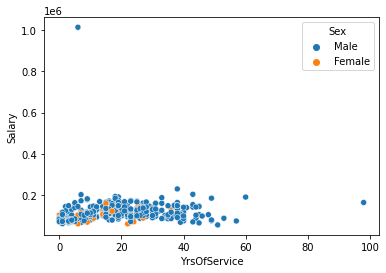

In [10]:
sns.scatterplot(x='YrsOfService', y='Salary', data=salary, hue = 'Sex')

<AxesSubplot:xlabel='Salary'>

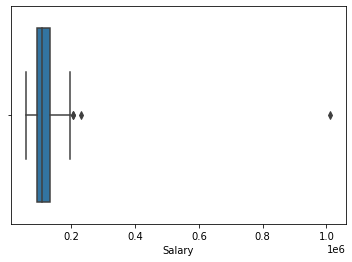

In [11]:
sns.boxplot(x=salary['Salary'])

## Question 4. Display and remove the outlier rows. 

In [12]:
salary = salary[salary.Salary < 400000]
salary = salary[salary.YrsOfService < 70]

<AxesSubplot:xlabel='Salary'>

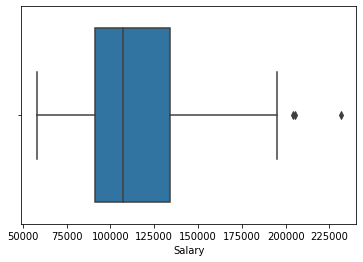

In [13]:
sns.boxplot(x = "Salary", data = salary)

<AxesSubplot:xlabel='YrsOfService', ylabel='Salary'>

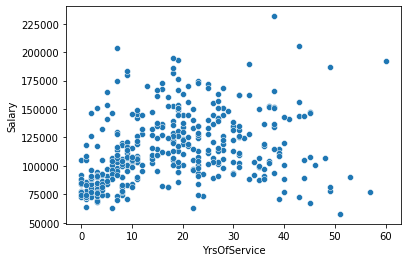

In [14]:
sns.scatterplot(x='YrsOfService', y='Salary', data=salary)

## Question 5. Calculate the average years of service for each rank using SQL. Then, Calculate the average years of service for each sex using SQL.

In [40]:
query1a = "select Rank, avg(YrsOfService) from salary group by Rank order by 2 desc"

ps.sqldf(query1a)

,Rank,avg(YrsOfService)
0,Prof,22.815789
1,AssocProf,11.953125
2,AsstProf,2.373134


In [39]:
query1b = "select sex, avg(YrsOfService) from salary group by sex order by 2 desc"

ps.sqldf(query1b)

,Sex,avg(YrsOfService)
0,Male,18.273743
1,Female,11.564103


## Question 6. Calculate the average salary by discipline using SQL. Then, calculate the average salary by sex using SQL.

In [41]:
query2 = "select Discipline, avg(Salary) from salary group by discipline order by 1 desc"

ps.sqldf(query2)

,Discipline,avg(Salary)
0,B,118028.694444
1,A,108548.430939


In [43]:
query3 = "select Sex, avg(Salary) from salary group by Sex order by 1 desc"

ps.sqldf(query3)

,Sex,avg(Salary)
0,Male,115090.418994
1,Female,101002.410256


## Question 7. For each rank, calculate the number of occurences, the mean salary, the minimum salary, and the maximum salary using one SQL statement.

In [44]:
query4 = "select Rank, count(Rank), avg(Salary), min(Salary), max(Salary) from salary group by Rank"

ps.sqldf(query4)

,Rank,count(Rank),avg(Salary),min(Salary),max(Salary)
0,AssocProf,64,93876.437500,62884,126431
1,AsstProf,67,80775.985075,63100,97032
2,Prof,266,126772.109023,57800,231545


## Question 8. Answer Question 7 using Pandas functions

In [19]:
salary.groupby(['Rank'])['Salary'].describe() # To descirbe the specific column we want to, we put the column AFTER the groupby

,count,mean,std,min,25%,50%,75%,max
Rank,,,,,,,,
AssocProf,64.0,93876.437500,13831.699844,62884.0,82475.00,95626.5,104226.25,126431.0
AsstProf,67.0,80775.985075,8174.112637,63100.0,74000.00,79800.0,88597.50,97032.0
Prof,266.0,126772.109023,27718.674999,57800.0,105975.25,123321.5,145080.50,231545.0


## Question 9. Calculate the standard deviation, skew and kurtosis for YrsSincePhd, YrsOfService and salary for each rank.

In [20]:
# DF for each column mentioned above
cols = ['YrsSincePhd','YrsOfService', 'Salary']
rankDF = salary.groupby(['Rank'])[cols]

In [46]:
print("Standard Deviation: ")
print(rankDF.std(),"\n")
print("Skewness: ")
print(rankDF.skew(),"\n")
print("Kurtosis: ")
print(rankDF.apply(pd.DataFrame.kurt)) # Way of applying kurtosis to a pandas series that is using a group by

Standard Deviation: 
           YrsSincePhd  YrsOfService        Salary
Rank                                              
AssocProf     9.652584     10.100180  13831.699844
AsstProf      2.541381      1.495811   8174.112637
Prof         10.108830     11.590493  27718.674999 

Skewness: 
           YrsSincePhd  YrsOfService    Salary
Rank                                          
AssocProf     2.139123      2.420949 -0.085893
AsstProf      0.524578     -0.026995  0.082975
Prof          0.358756      0.448171  0.590007 

Kurtosis: 
           YrsSincePhd  YrsOfService    Salary
Rank                                          
AssocProf     4.414356      6.350832 -0.586327
AsstProf     -0.358052     -0.658746 -0.920936
Prof         -0.619154     -0.225623  0.376064


## Question 10. Plot the histogram of YrsOfService and Salary for different Ranks using 5 bins

In [22]:
serviceHisto = salary['YrsOfService']

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

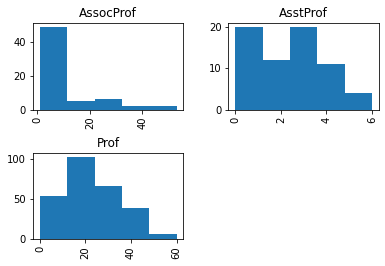

In [23]:
serviceHisto.hist(by=salary['Rank'], bins=5) # Seperates the data into 5 bins and calculates the total within each bin

In [24]:
salaryHisto = salary['Salary']

array([[<AxesSubplot:title={'center':'AssocProf'}>,
        <AxesSubplot:title={'center':'AsstProf'}>],
       [<AxesSubplot:title={'center':'Prof'}>, <AxesSubplot:>]],
      dtype=object)

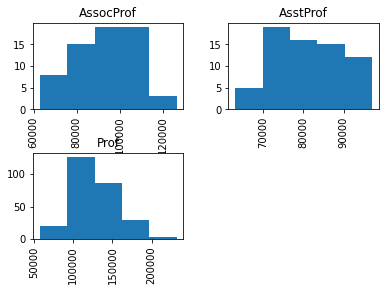

In [25]:
salaryHisto.hist(by = salary['Rank'], bins = 5)

## Question 11. Describe the YrsOfService and Salary distributions for each rank. Use the skew and kurtosis in your descriptions.
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

### Skewness - Where the mass of the distribution is concentrated. 
    Positive Skew = Data concentrated on the left of the distribution. 
        - So the larger the positive value, the more values concentrated on the left.
    Negative skew = Data concentrated on the right of the distribution.
        - As the negative number decreases, that means more values are concentrated on the right.

### Kurtosis - Measure of the thickness of the tails of a distribution. 
    High kurtosis = heavy tails = more outliers. 
    Low kurtosis = light tails = lack of outliers. 

1. Associate Professor - 
    - YrsOfService - The distributions for YrsOfService for associate professors is a positive skew and a positive kurtosis. 
    - Salary - The distributions for Salary for associate professors is negative skew and a negative kurtosis.
2. Assistant professor - 
    - YrsOfService - The distributions for YrsOfService for assistant professors is a negative skew and a negative kurtosis. 
    - Salary - The distributions for YrsOfService for assistant professors is a positive skew and a negative kurtosis.
3. Professor - 
    - YrsOfService - The distributions for YrsOfService for professors is a positive skew and a negative kurtosis. 
    - Salary - The distributions for YrsOfService for  professors is a positive skew and a negative kurtosis.

## Question 12. Calculate correlations of all the factors among themselves and determine which factors among YrsSincePhd or YrsOfService will affect Salary the most. Will your answers change if you break it down by Sex and by Discipline?

In [26]:
salary.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909649,0.419231
YrsOfService,0.909649,1.000000,0.334745
Salary,0.419231,0.334745,1.000000


YrsSincePhd will have the greatest affect on an individuals salary

In [27]:
sexCorr = salary.groupby(['Sex'])
sexCorr.corr()

YrsSincePhd  YrsOfService    Salary
Sex                                                     
Female YrsSincePhd      1.000000      0.857775  0.620135
       YrsOfService     0.857775      1.000000  0.556021
       Salary           0.620135      0.556021  1.000000
Male   YrsSincePhd      1.000000      0.910520  0.392718
       YrsOfService     0.910520      1.000000  0.306599
       Salary           0.392718      0.306599  1.000000

In [28]:
disCorr = salary.groupby(['Discipline'])
disCorr.corr()

YrsSincePhd  YrsOfService    Salary
Discipline                                                  
A          YrsSincePhd      1.000000      0.916403  0.401158
           YrsOfService     0.916403      1.000000  0.235969
           Salary           0.401158      0.235969  1.000000
B          YrsSincePhd      1.000000      0.899218  0.535197
           YrsOfService     0.899218      1.000000  0.502052
           Salary           0.535197      0.502052  1.000000

The answer will not change if you were to groupby sex or discipline. 

### Now Load a different dataset (MPG dataset number 3)

In [29]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code here to fix the missing values by imputing value from the mean

In [30]:
mpg.isnull().any()

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [31]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,404.000000,405.000000,405.000000,399.000000,404.000000,405.000000,405.000000
mean,23.645545,5.493827,194.504938,105.593985,3020.866337,15.521481,75.987654
std,8.465607,1.847687,105.231828,42.317959,1282.513294,2.792380,3.746595
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2227.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,267.000000,129.000000,3614.750000,17.100000,79.000000
max,90.000000,20.000000,455.000000,450.000000,22340.000000,24.800000,85.000000


In [32]:
mpg['mpg'] = mpg['mpg'].fillna(value = mpg['mpg'].mean())
mpg['horsepower'] = mpg['horsepower'].fillna(value = mpg['horsepower'].mean())
mpg['weight'] = mpg['weight'].fillna(value = mpg['weight'].mean())

In [33]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool